In [2]:
import pandas as pd
import geopandas as gpd
import libpysal as lp

In [ ]:
# # Script to construct adjacency matrix for neighborhoods
# file_path = "../../data/WijkBuurtkaart_2024_v1/wijkenbuurten_2024_v1.gpkg"


# gdf = gpd.read_file(filename=file_path, layer='buurten')

# gdf_neighbors = lp.weights.Queen.from_dataframe(gdf, use_index=False)

# gdf_neighbors.to_sparse()

# codes = gdf.iloc[:, :1].to_numpy().flatten()
# adj_df = pd.DataFrame.sparse.from_spmatrix(
#     gdf_neighbors.to_sparse(), index=codes, columns=codes
# )

# adj_df.head(10)

# adj_df.to_csv("../../housing-data/buurt_adjacency.csv", index=True)

In [ ]:
df_total = pd.read_parquet('../../housing-data/original/df_total_ml.parquet')
df_spatial = pd.read_parquet('../../housing-data/original/ml_dataset_spatial.parquet')

In [4]:
df_total.describe()

,TRANSID,DATUM,KOOPSOM,SOC,CALCOPP,KAVOPP,BOUWJAAR,LAT,LON,GELUIDSHINDERTOTAAL,...,GARAGE_OPP,POSTCODE_4,PROVINCIECODE,GEMEENTECODE,COROPPLUSCODE,FOTOWIJZER_TYPE,DUMMY_GARAGE,DUMMY_BERGING,DUMMY_MONUMENT,ENERGIELABEL
count,1.613931e+06,1613931,1.613931e+06,1.613931e+06,1.613931e+06,1.613931e+06,1.613931e+06,1.606548e+06,1.606548e+06,1.613540e+06,...,208205.000000,1.613931e+06,1.613931e+06,1.613931e+06,1.613931e+06,1.613931e+06,1.613931e+06,1.613931e+06,1.613931e+06,1.384464e+06
mean,6.266934e+06,2019-11-29 08:40:56.830682368,3.454269e+05,1.156110e+03,1.175826e+02,3.668574e+02,1.967725e+03,5.209874e+01,5.289038e+00,3.132989e-01,...,9.231325,4.711797e+03,2.664870e+01,7.429116e+02,2.284873e+03,6.277905e+00,2.815077e-01,6.691054e-01,5.942014e-03,4.820666e+00
min,4.328792e+06,2014-10-01 00:00:00,2.000000e+04,1.101000e+03,9.000000e+00,0.000000e+00,1.005000e+03,5.075342e+01,3.362437e+00,1.110783e-01,...,0.000000,1.011000e+03,2.000000e+01,1.400000e+01,1.000000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.005154e+06,2017-08-01 00:00:00,2.125000e+05,1.121000e+03,8.700000e+01,0.000000e+00,1.953000e+03,5.181074e+01,4.661402e+00,2.972413e-01,...,0.000000,2.597000e+03,2.500000e+01,3.130000e+02,1.500000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.825587e+06,2019-12-24 00:00:00,2.950000e+05,1.131000e+03,1.110000e+02,1.580000e+02,1.974000e+03,5.207841e+01,5.180537e+00,3.125480e-01,...,0.000000,4.382000e+03,2.700000e+01,5.180000e+02,2.322000e+03,6.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00
75%,8.022908e+06,2022-03-29 00:00:00,4.160000e+05,1.182000e+03,1.360000e+02,2.860000e+02,1.994000e+03,5.237094e+01,5.872043e+00,3.280773e-01,...,18.000000,6.712000e+03,2.800000e+01,8.880000e+02,3.200000e+03,9.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00
max,8.864745e+06,2024-09-30 00:00:00,4.975000e+06,9.999000e+03,2.069000e+03,1.649430e+05,2.024000e+03,5.348792e+01,7.215435e+00,4.486730e-01,...,100.000000,9.999000e+03,3.100000e+01,1.992000e+03,4.003000e+03,5.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01
std,1.469989e+06,NaN,2.128692e+05,7.930783e+01,4.815740e+01,1.392867e+03,3.730685e+01,5.113030e-01,7.692156e-01,2.466764e-02,...,14.511869,2.479025e+03,2.854767e+00,6.060058e+02,1.027420e+03,4.802145e+00,4.497346e-01,4.705353e-01,7.685512e-02,1.772496e+00


In [5]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1613931 entries, 873933 to 370685
Data columns (total 90 columns):
 #   Column                                 Non-Null Count    Dtype         
---  ------                                 --------------    -----         
 0   TRANSID                                1613931 non-null  int64         
 1   DATUM                                  1613931 non-null  datetime64[ns]
 2   KOOPSOM                                1613931 non-null  int64         
 3   WONINGTYPE                             1613931 non-null  object        
 4   SOC                                    1613931 non-null  int64         
 5   CALCOPP                                1613931 non-null  int64         
 6   KAVOPP                                 1613931 non-null  int64         
 7   BOUWJAAR                               1613931 non-null  int64         
 8   LAT                                    1606548 non-null  float64       
 9   LON                                 

In [6]:
df_spatial.describe()

,TRANSID,KOOPSOM,SOC,CALCOPP,KAVOPP,BOUWJAAR,COROPPLUSCODE,POSTCODE4,LAT,LON,...,OMGEVINGSADRESSENDICHTHEID,LIGGING,KWALITEIT,ONDERHOUD,UITSTRALING,DOELMATIGHEID,VOORZIENINGEN,AANBOUW_OPP,BERGING_OPP,GARAGE_OPP
count,1.680083e+06,1.680083e+06,1.680083e+06,1.680083e+06,1.680083e+06,1.680083e+06,1.680083e+06,1.679657e+06,1.672278e+06,1.672278e+06,...,1.679657e+06,203228.000000,206712.000000,206772.000000,163389.000000,168780.000000,173846.000000,208883.000000,208883.000000,208257.000000
mean,6.188582e+06,3.411817e+05,1.156130e+03,1.176012e+02,3.677051e+02,1.967633e+03,2.284488e+03,4.706987e+03,5.209899e+01,5.287727e+00,...,1.924150e+03,3.017286,3.034425,3.055206,3.010680,2.999751,2.965015,7.316632,8.613750,9.230518
std,1.492101e+06,2.117346e+05,7.901191e+01,4.804759e+01,1.398398e+03,3.720478e+01,1.026367e+03,2.479321e+03,5.109003e-01,7.687041e-01,...,1.708392e+03,0.302888,0.559639,0.524998,0.186916,0.146936,0.484398,14.503901,27.398729,14.511369
min,4.208892e+06,2.000000e+04,1.101000e+03,9.000000e+00,0.000000e+00,1.005000e+03,1.000000e+02,1.011000e+03,5.075342e+01,3.362437e+00,...,2.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.921296e+06,2.100000e+05,1.121000e+03,8.800000e+01,0.000000e+00,1.953000e+03,1.500000e+03,2.597000e+03,5.181137e+01,4.661140e+00,...,8.550000e+02,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000
50%,5.769884e+06,2.900000e+05,1.131000e+03,1.110000e+02,1.580000e+02,1.974000e+03,2.322000e+03,4.371000e+03,5.207874e+01,5.179040e+00,...,1.499000e+03,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,5.000000,0.000000
75%,7.894878e+06,4.110000e+05,1.182000e+03,1.360000e+02,2.860000e+02,1.993000e+03,3.200000e+03,6.711000e+03,5.237083e+01,5.870173e+00,...,2.419000e+03,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,11.000000,8.000000,18.000000
max,8.864745e+06,4.975000e+06,9.999000e+03,2.069000e+03,1.649430e+05,2.024000e+03,4.003000e+03,9.999000e+03,5.348792e+01,7.215435e+00,...,1.255900e+04,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,739.000000,2209.000000,100.000000


In [20]:

df_spatial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680083 entries, 0 to 1680082
Data columns (total 86 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   TRANSID                                1680083 non-null  int64  
 1   DATUM                                  1680083 non-null  object 
 2   KOOPSOM                                1680083 non-null  int64  
 3   WONINGTYPE                             1680083 non-null  object 
 4   SOC                                    1680083 non-null  int64  
 5   CALCOPP                                1680083 non-null  int64  
 6   KAVOPP                                 1680083 non-null  int64  
 7   BOUWJAAR                               1680083 non-null  int64  
 8   COROPPLUSCODE                          1680083 non-null  int64  
 9   GEMEENTECODE                           1679657 non-null  object 
 10  WIJKCODE                               167

In [8]:
cols = df_spatial.columns[df_spatial.isna().sum() >0]
cols

Index(['GEMEENTECODE', 'WIJKCODE', 'BUURTCODE', 'POSTCODE4', 'POSTCODE', 'LAT',
       'LON', 'GELUIDSHINDERTOTAAL', 'GROEN', 'PM10', 'PM2_5', 'NO2',
       'HUISARTSENPRAKTIJK', 'HUISARTSENPOST', 'APOTHEEK', 'ZIEKENHUIS',
       'ZIEKENHUISEXCLBUITENPOLIKLINIEK', 'GROTESUPERMARKT',
       'OVDAGELLEVENSMIDDELEN', 'WARENHUIS', 'CAFEED', 'CAFETARIAED',
       'RESTAURANT', 'KINDERDAGVERBLIJF', 'BUITENSCHOOLSEOPVANG',
       'OPRITHOOFDVERKEERSWEG', 'TREINSTATIONSTOTAAL',
       'BELANGRIJKOVERSTAPSTATION', 'BIBLIOTHEEK', 'ZWEMBAD', 'LEEFBAAROMETER',
       'K_0TOT15JAAR', 'K_15TOT25JAAR', 'K_25TOT45JAAR', 'K_45TOT65JAAR',
       'K_65JAAROFOUDER', 'GEBOORTERELATIEF', 'STERFTERELATIEF',
       'EENPERSOONSHUISHOUDENS', 'HUISHOUDENSZONDERKINDEREN',
       'HUISHOUDENSMETKINDEREN', 'GEMIDDELDEHUISHOUDENSGROOTTE',
       'BEVOLKINGSDICHTHEID', 'PERCENTAGEMEERGEZINSWONING',
       'PERCENTAGEONBEWOOND', 'INBEZITWONINGCORPORATIE',
       'INBEZITOVERIGEVERHUURDERS', 'EIGENDOMONBEKEND', 'BOUWJ

In [9]:
extra_total = df_total.columns.difference(df_spatial.columns)
extra_spatial = df_spatial.columns.difference(df_total.columns)

print("Features in ML total data but not in ML spatial:", extra_total)
print("Features in ML spatial data but not in ML total", extra_spatial)

print(len(df_total.columns))
print(len(df_spatial.columns))
print(len(extra_total))



print("Expected size of merged df: 94" )

Features in ML total data but not in ML spatial: Index(['BESTEMMING', 'DUMMY_BERGING', 'DUMMY_GARAGE', 'DUMMY_MONUMENT',
       'ENERGIELABEL', 'FOTOWIJZER_TYPE', 'POSTCODE_4', 'PROVINCIECODE'],
      dtype='object')
Features in ML spatial data but not in ML total Index(['BUURTCODE', 'POSTCODE', 'POSTCODE4', 'WIJKCODE'], dtype='object')
90
86
8
Expected size of merged df: 94


In [10]:
df_combined = df_spatial.merge(df_total[extra_total.append(pd.Index(["TRANSID"]))], on="TRANSID", how='inner')

In [11]:
# Repeated column
df_combined.drop(["POSTCODE4"], inplace=True, axis=1)

In [12]:
df_combined.to_csv("../../housing-data/transaction_data.csv", index=False)

## Preprocess Data

In [23]:
df_combined = pd.read_csv("../../housing-data/transaction_data.csv")

In [24]:
nan_percentages = df_combined.isna().mean()*100
nan_percentages = nan_percentages[nan_percentages>1]
nan_percentages


HUISARTSENPRAKTIJK                  1.841828
HUISARTSENPOST                      1.841828
APOTHEEK                            1.841828
ZIEKENHUIS                          1.841828
ZIEKENHUISEXCLBUITENPOLIKLINIEK     1.841828
GROTESUPERMARKT                     1.841828
OVDAGELLEVENSMIDDELEN               1.841828
WARENHUIS                           1.841828
CAFEED                              1.841828
CAFETARIAED                         1.841828
RESTAURANT                          1.841828
KINDERDAGVERBLIJF                   1.841828
BUITENSCHOOLSEOPVANG                1.841828
OPRITHOOFDVERKEERSWEG               1.841828
TREINSTATIONSTOTAAL                 1.841828
BELANGRIJKOVERSTAPSTATION           1.841828
BIBLIOTHEEK                         1.841828
ZWEMBAD                             1.841828
AFSTANDTOTSCHOOL                    1.841828
LIGGING                            87.411118
KWALITEIT                          87.195249
ONDERHOUD                          87.191531
UITSTRALIN

In [25]:
# Drop columns with more than 10% Nans
df_combined.drop(columns=["LIGGING", "KWALITEIT", "ONDERHOUD", "UITSTRALING", "DOELMATIGHEID", "VOORZIENINGEN", "AANBOUW_OPP", "BERGING_OPP", "GARAGE_OPP", "ENERGIELABEL"],inplace=True, axis=1)
df_combined.columns

Index(['TRANSID', 'DATUM', 'KOOPSOM', 'WONINGTYPE', 'SOC', 'CALCOPP', 'KAVOPP',
       'BOUWJAAR', 'COROPPLUSCODE', 'GEMEENTECODE', 'WIJKCODE', 'BUURTCODE',
       'POSTCODE', 'LAT', 'LON', 'GELUIDSHINDERTOTAAL', 'GROEN', 'PM10',
       'PM2_5', 'NO2', 'HUISARTSENPRAKTIJK', 'HUISARTSENPOST', 'APOTHEEK',
       'ZIEKENHUIS', 'ZIEKENHUISEXCLBUITENPOLIKLINIEK', 'GROTESUPERMARKT',
       'OVDAGELLEVENSMIDDELEN', 'WARENHUIS', 'CAFEED', 'CAFETARIAED',
       'RESTAURANT', 'KINDERDAGVERBLIJF', 'BUITENSCHOOLSEOPVANG',
       'OPRITHOOFDVERKEERSWEG', 'TREINSTATIONSTOTAAL',
       'BELANGRIJKOVERSTAPSTATION', 'BIBLIOTHEEK', 'ZWEMBAD', 'LEEFBAAROMETER',
       'K_0TOT15JAAR', 'K_15TOT25JAAR', 'K_25TOT45JAAR', 'K_45TOT65JAAR',
       'K_65JAAROFOUDER', 'GEBOORTERELATIEF', 'STERFTERELATIEF',
       'EENPERSOONSHUISHOUDENS', 'HUISHOUDENSZONDERKINDEREN',
       'HUISHOUDENSMETKINDEREN', 'GEMIDDELDEHUISHOUDENSGROOTTE',
       'BEVOLKINGSDICHTHEID', 'PERCENTAGEMEERGEZINSWONING',
       'PERCENTAGEONBEW

In [26]:
nan_percentages = df_combined.isna().mean()*100
nan_percentages = nan_percentages[nan_percentages>0]
nan_percentages

GEMEENTECODE                         0.024226
WIJKCODE                             0.024226
BUURTCODE                            0.024226
POSTCODE                             0.024226
LAT                                  0.457266
                                       ...   
RUCULTUURRECREATIEOVERIGEDIENSTEN    0.024226
PERSONENAUTOSPERHUISHOUDEN           0.024536
AFSTANDTOTSCHOOL                     1.841828
MATEVANSTEDELIJKHEID                 0.024226
OMGEVINGSADRESSENDICHTHEID           0.024226
Length: 67, dtype: float64

In [27]:
# Drop rows where Buurtcode is NaN
df_combined.dropna(subset=["BUURTCODE"], inplace=True)
nan_percentages = df_combined.isna().mean()*100
nan_percentages = nan_percentages[nan_percentages>0]
nan_percentages

LAT                                      0.442751
LON                                      0.442751
HUISARTSENPRAKTIJK                       1.818042
HUISARTSENPOST                           1.818042
APOTHEEK                                 1.818042
ZIEKENHUIS                               1.818042
ZIEKENHUISEXCLBUITENPOLIKLINIEK          1.818042
GROTESUPERMARKT                          1.818042
OVDAGELLEVENSMIDDELEN                    1.818042
WARENHUIS                                1.818042
CAFEED                                   1.818042
CAFETARIAED                              1.818042
RESTAURANT                               1.818042
KINDERDAGVERBLIJF                        1.818042
BUITENSCHOOLSEOPVANG                     1.818042
OPRITHOOFDVERKEERSWEG                    1.818042
TREINSTATIONSTOTAAL                      1.818042
BELANGRIJKOVERSTAPSTATION                1.818042
BIBLIOTHEEK                              1.818042
ZWEMBAD                                  1.818042


In [28]:
# Drop rows where LAT is NaN
df_combined.dropna(subset=["LAT"], inplace=True)
nan_percentages = df_combined.isna().mean()*100
nan_percentages = nan_percentages[nan_percentages>0]
nan_percentages

HUISARTSENPRAKTIJK                       1.821956
HUISARTSENPOST                           1.821956
APOTHEEK                                 1.821956
ZIEKENHUIS                               1.821956
ZIEKENHUISEXCLBUITENPOLIKLINIEK          1.821956
GROTESUPERMARKT                          1.821956
OVDAGELLEVENSMIDDELEN                    1.821956
WARENHUIS                                1.821956
CAFEED                                   1.821956
CAFETARIAED                              1.821956
RESTAURANT                               1.821956
KINDERDAGVERBLIJF                        1.821956
BUITENSCHOOLSEOPVANG                     1.821956
OPRITHOOFDVERKEERSWEG                    1.821956
TREINSTATIONSTOTAAL                      1.821956
BELANGRIJKOVERSTAPSTATION                1.821956
BIBLIOTHEEK                              1.821956
ZWEMBAD                                  1.821956
LEEFBAAROMETER                           0.005976
GEBOORTERELATIEF                         0.904753


In [29]:
edge_ind = pd.read_csv("../../housing-data/buurt_adjacency.csv", index_col=0)
edge_ind

,BU09989999,BU00349997,BU00509997,BU00609998,BU00729998,BU00889998,BU00939998,BU00969998,BU01669997,BU01719997,...,BU19923005,BU19923006,BU19923009,BU19923100,BU19923109,BU19923200,BU19923201,BU19923202,BU19923209,BU19923300
BU09989999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BU00349997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BU00509997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BU00609998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BU00729998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BU19923200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
BU19923201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
BU19923202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
BU19923209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [30]:
buurt_ids = edge_ind.columns.values
buurt_idx_maq = {k:v for v,k in enumerate(buurt_ids)}

In [31]:
unique_codes = df_combined["BUURTCODE"].unique()
count=0
missing_burt_codes = set()
for code in unique_codes:
    if code not in buurt_idx_maq.keys():
        count +=1
        missing_burt_codes.add(code)
        # print(code)
print(count)
print(missing_burt_codes)

3582
{'BU09620102', 'BU07560800', 'BU03630426', 'BU00803602', 'BU00630102', 'BU04250001', 'BU03100100', 'BU07721334', 'BU06170010', 'BU00340306', 'BU08440292', 'BU02250004', 'BU01750800', 'BU03980602', 'BU03981803', 'BU19211401', 'BU04201103', 'BU07070201', 'BU00181107', 'BU03630380', 'BU03450405', 'BU04200000', 'BU03980800', 'BU03633301', 'BU03639500', 'BU03170008', 'BU06060803', 'BU03630106', 'BU03100400', 'BU08550200', 'BU08600401', 'BU00050000', 'BU17080016', 'BU05470109', 'BU16840002', 'BU17220007', 'BU07380600', 'BU06030552', 'BU08740002', 'BU19211910', 'BU06200201', 'BU03630384', 'BU16840209', 'BU04570303', 'BU07330309', 'BU00400003', 'BU00220200', 'BU19610004', 'BU03632500', 'BU05790024', 'BU03630448', 'BU03561100', 'BU03631404', 'BU00900002', 'BU07620309', 'BU00240100', 'BU09952337', 'BU03636800', 'BU06200000', 'BU19490404', 'BU00630004', 'BU03634800', 'BU03630101', 'BU03634902', 'BU16630003', 'BU05840012', 'BU17110104', 'BU03100002', 'BU03633308', 'BU03635401', 'BU17340200', 

In [32]:

df_missing = df_combined[df_combined["BUURTCODE"].isin(missing_burt_codes)]
print("Percentage with missing buurtcodes:", len(df_missing)/len(df_combined))


Percentage with missing buurtcodes: 0.13584058814557973


In [33]:
df_combined = df_combined[df_combined["BUURTCODE"].isin(buurt_idx_maq.keys())] 
df_combined["BUURTCODE"]

0          BU19780402
1          BU03750702
2          BU02680970
3          BU05180907
4          BU07360102
              ...    
1613934    BU04020703
1613935    BU03420601
1613936    BU02280301
1613937    BU03072403
1613939    BU19450800
Name: BUURTCODE, Length: 1388190, dtype: object

In [34]:
df_combined = df_combined.dropna()

In [35]:
df_object = df_combined.select_dtypes(include='object')
df_object.columns

Index(['DATUM', 'WONINGTYPE', 'GEMEENTECODE', 'WIJKCODE', 'BUURTCODE',
       'POSTCODE', 'BESTEMMING'],
      dtype='object')

In [36]:
import datetime 
df_combined["DATUM"] = pd.to_datetime(df_combined['DATUM'], dayfirst=True)
df_combined["DATUM"] =  df_combined["DATUM"].dt.strftime('%y-%m')

In [38]:
df_combined["GEMEENTECODE"]

0          GM1978
1          GM0375
2          GM0268
3          GM0518
4          GM0736
            ...  
1613934    GM0402
1613935    GM0342
1613936    GM0228
1613937    GM0307
1613939    GM1945
Name: GEMEENTECODE, Length: 1358829, dtype: object

In [33]:
# import numpy as np
# alpha = 0.005
# price_per_m2 = df_combined['KOOPSOM'] / df_combined['CALCOPP']
# quantile_threshold = np.quantile(price_per_m2, [alpha/2, 1-alpha/2])
# df_combined = df_combined[(price_per_m2 > quantile_threshold[0]) & (price_per_m2 < quantile_threshold[1])]

In [41]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1358829 entries, 0 to 1613939
Data columns (total 83 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   TRANSID                                1358829 non-null  int64  
 1   DATUM                                  1358829 non-null  object 
 2   KOOPSOM                                1358829 non-null  int64  
 3   WONINGTYPE                             1358829 non-null  object 
 4   SOC                                    1358829 non-null  int64  
 5   CALCOPP                                1358829 non-null  int64  
 6   KAVOPP                                 1358829 non-null  int64  
 7   BOUWJAAR                               1358829 non-null  int64  
 8   COROPPLUSCODE                          1358829 non-null  int64  
 9   GEMEENTECODE                           1358829 non-null  object 
 10  WIJKCODE                               1358829 

In [42]:
import numpy as np
df_combined["LOG_KOOPSOM"] = np.log(df_combined["KOOPSOM"])

In [44]:
df_rotterdam = df_combined[df_combined["GEMEENTECODE"] == "GM0599"]

In [50]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
cat_cols = ['DATUM', 'WONINGTYPE', 'GEMEENTECODE', 'WIJKCODE', 'POSTCODE', 'BESTEMMING']
df_combined[cat_cols] = enc.fit_transform(df_combined[cat_cols])

df_rotterdam[cat_cols] = enc.fit_transform(df_rotterdam[cat_cols])

In [51]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_combined, test_size=0.2, random_state=42)

## Saving cleaned files

In [52]:
df_combined.to_csv("../../housing-data/combined_data_cleaned.csv", index=False)
df_train.to_csv("../../housing-data/train.csv", index=False)
df_test.to_csv("../../housing-data/test.csv", index=False)
df_rotterdam.to_csv("../../housing-data/rotterdam_data.csv", index=False)

## Loading Train and Test Dataframes

In [53]:
df_train = pd.read_csv("../../housing-data/train.csv")

df_test = pd.read_csv("../../housing-data/test.csv")

df_rotterdam = pd.read_csv("../../housing-data/rotterdam_data.csv")


## Comparing Distributions between Train and Test

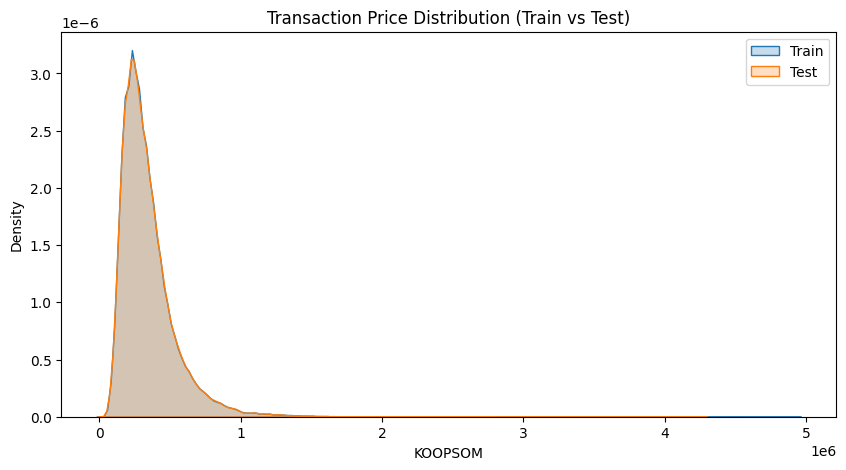

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.kdeplot(df_train["KOOPSOM"], label="Train", fill = True)
sns.kdeplot(df_test["KOOPSOM"], label="Test", fill = True)
plt.legend()
plt.title("Transaction Price Distribution (Train vs Test)")
plt.show()

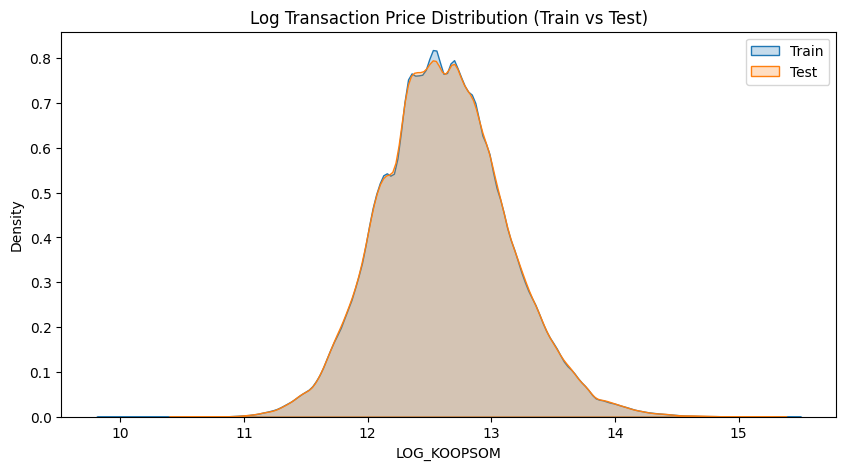

In [5]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_train["LOG_KOOPSOM"], label="Train", fill = True)
sns.kdeplot(df_test["LOG_KOOPSOM"], label="Test", fill = True)
plt.legend()
plt.title("Log Transaction Price Distribution (Train vs Test)")
plt.show()

In [6]:
def plot_feature_distribution(train_df, test_df, feature):
    plt.figure(figsize=(10,5))
    sns.kdeplot(train_df[feature], label="train", fill=True)
    sns.kdeplot(test_df[feature], label="Test", fill=True)
    plt.legend()
    plt.title(f"Distribution of {feature} (Train vs Test)")
    plt.show()

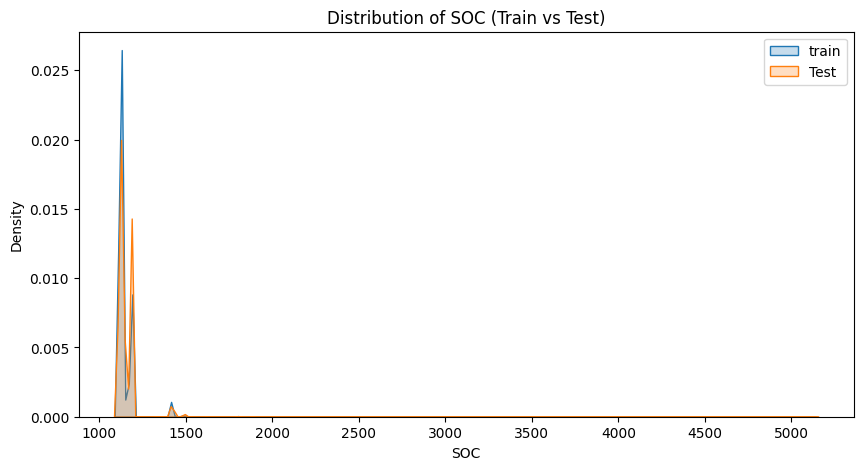

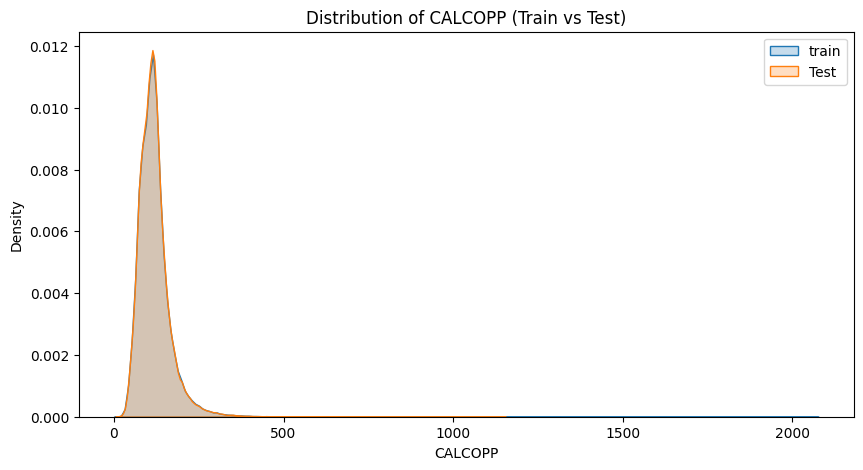

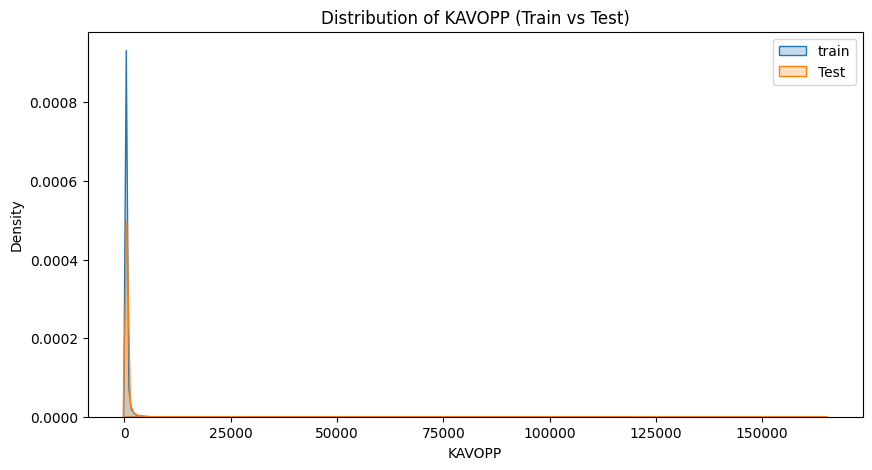

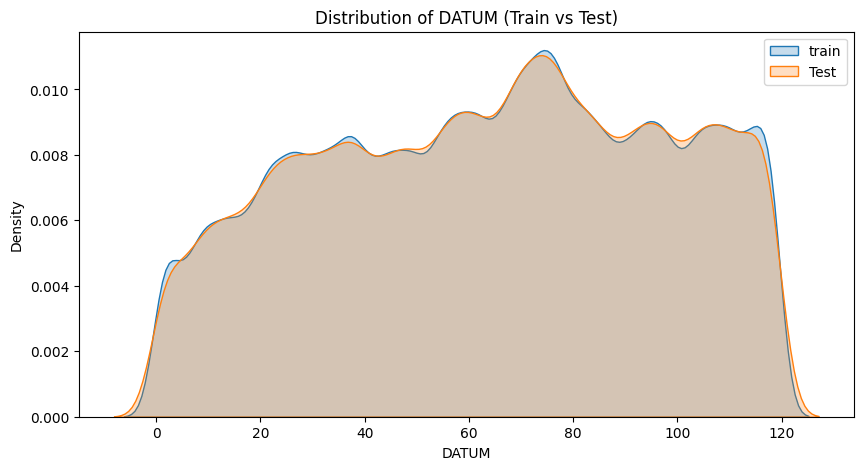

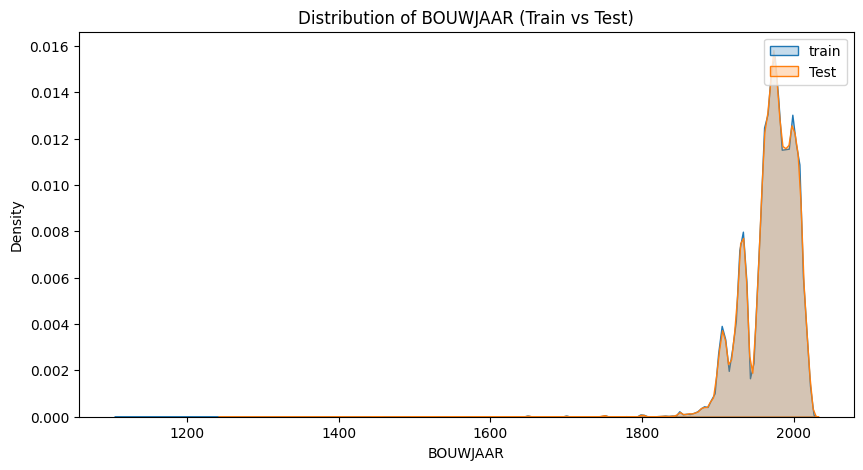

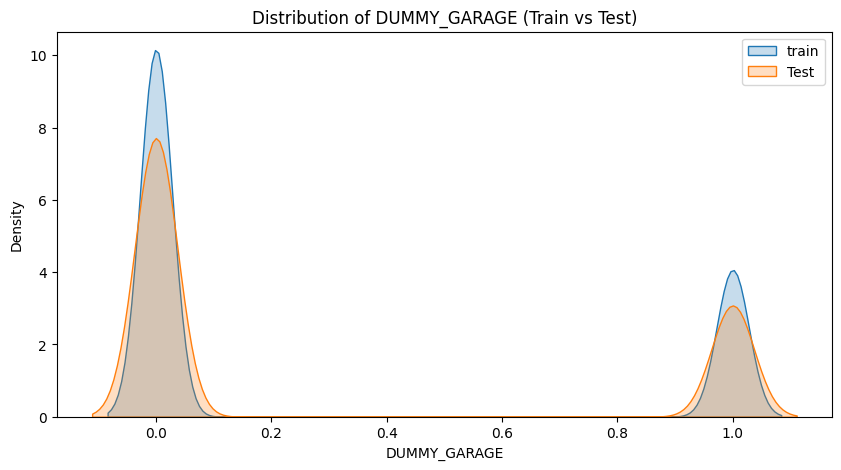

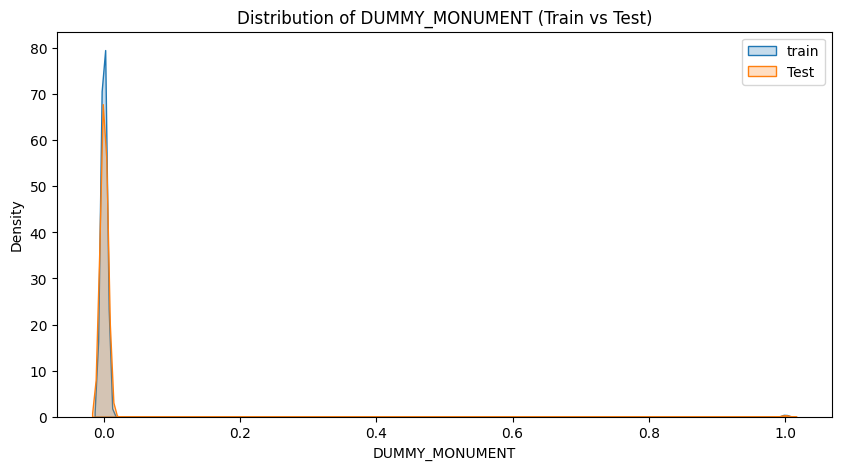

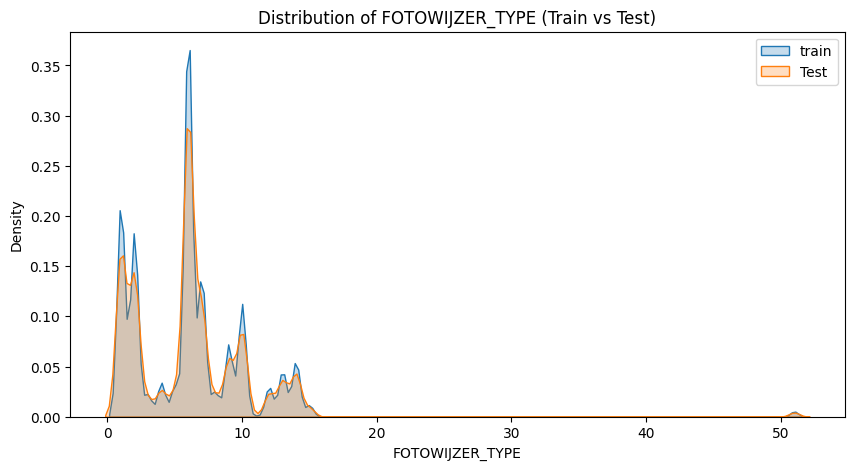

In [7]:
# ["SOC", "CALCOPP", "KAVOPP",
    # "BOUWJAAR", "DUMMY_GARAGE", "DUMMY_MONUMENT", "FOTOWIJZER_TYPE", "DATUM"]
plot_feature_distribution(df_train, df_test, "SOC")
plot_feature_distribution(df_train, df_test, "CALCOPP")
plot_feature_distribution(df_train, df_test, "KAVOPP")
plot_feature_distribution(df_train, df_test, "DATUM")
plot_feature_distribution(df_train, df_test, "BOUWJAAR")
plot_feature_distribution(df_train, df_test, "DUMMY_GARAGE")
plot_feature_distribution(df_train, df_test, "DUMMY_MONUMENT")
plot_feature_distribution(df_train, df_test, "FOTOWIJZER_TYPE")

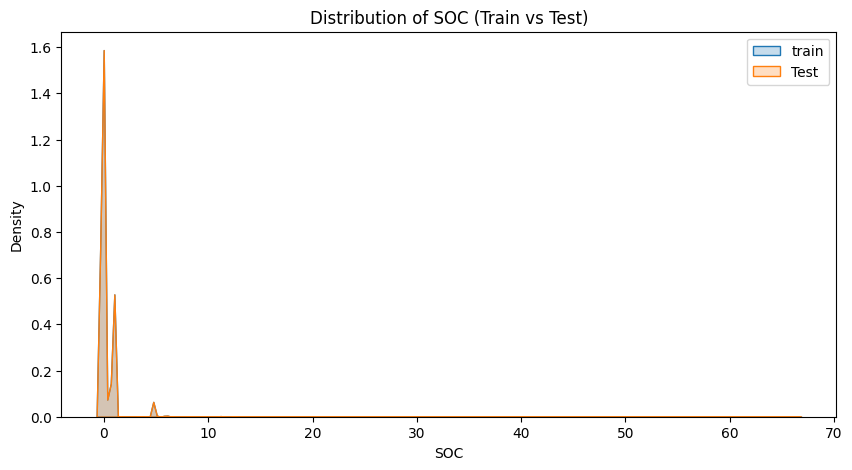

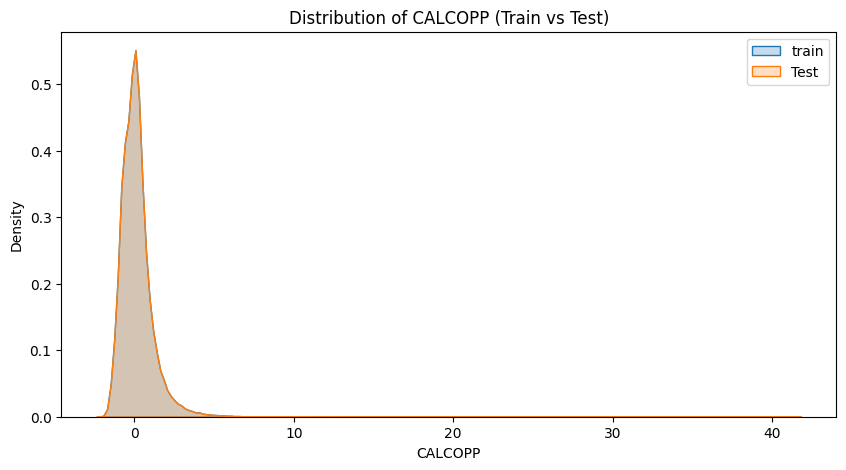

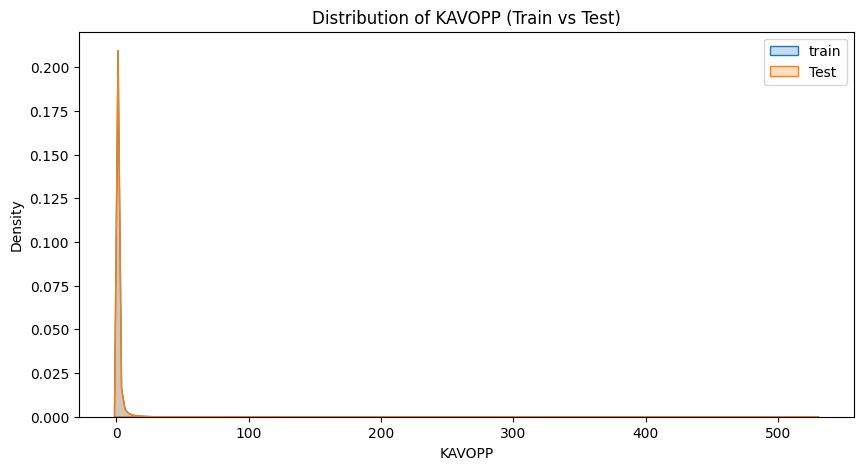

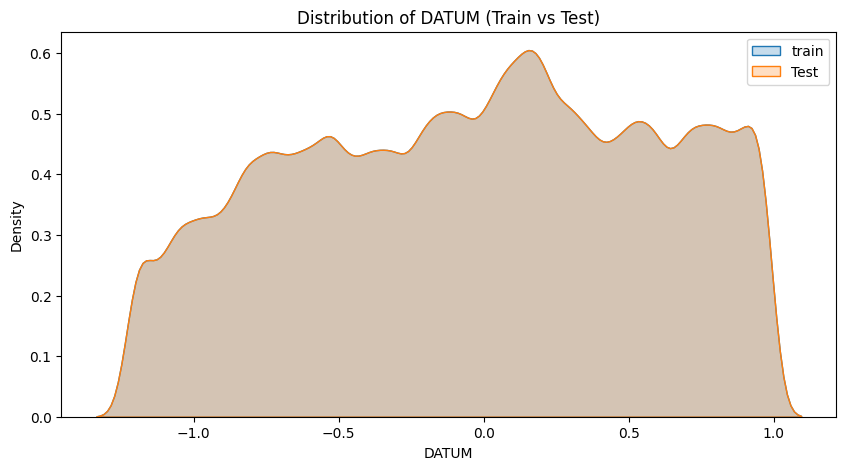

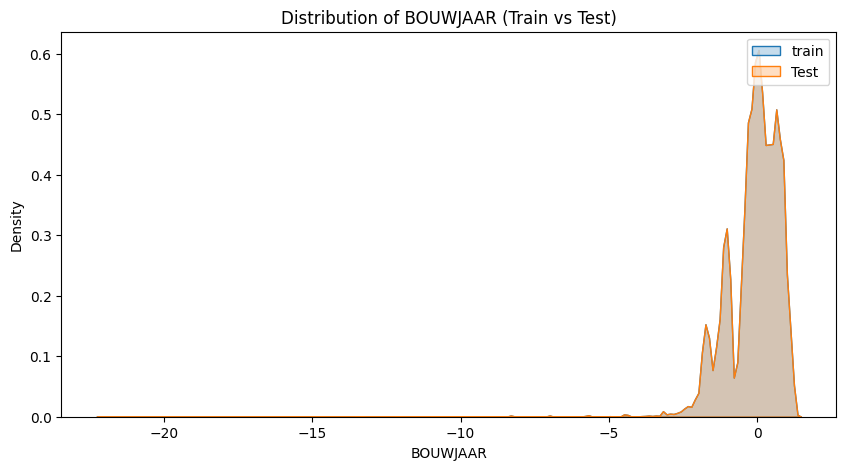

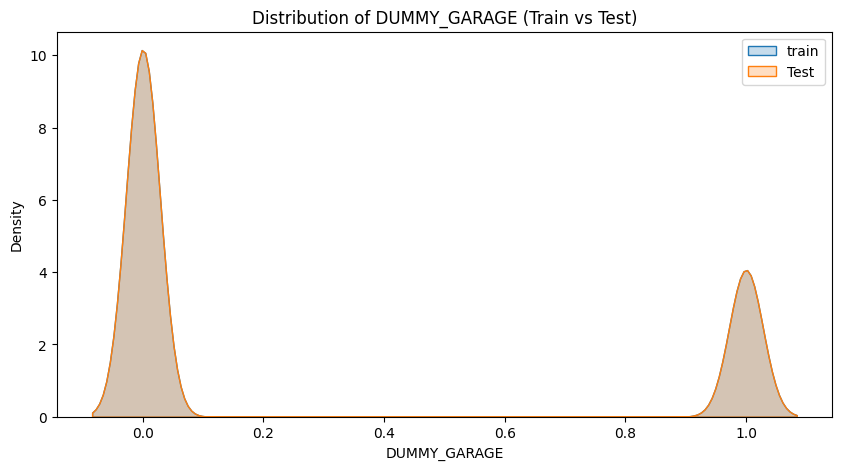

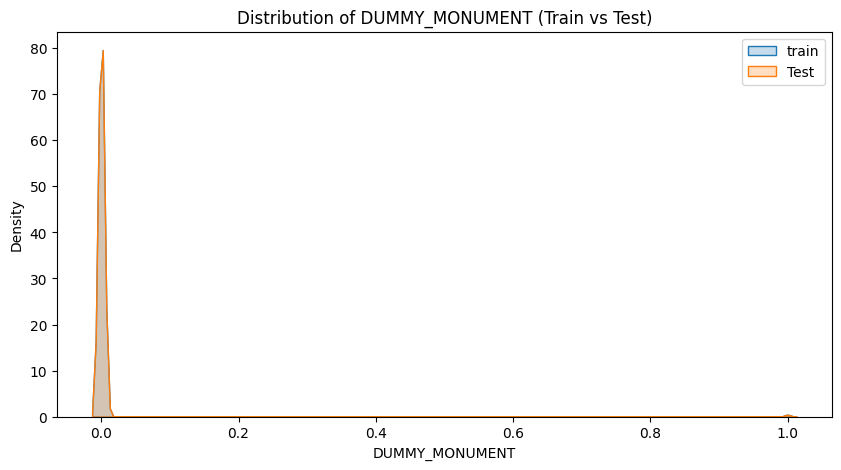

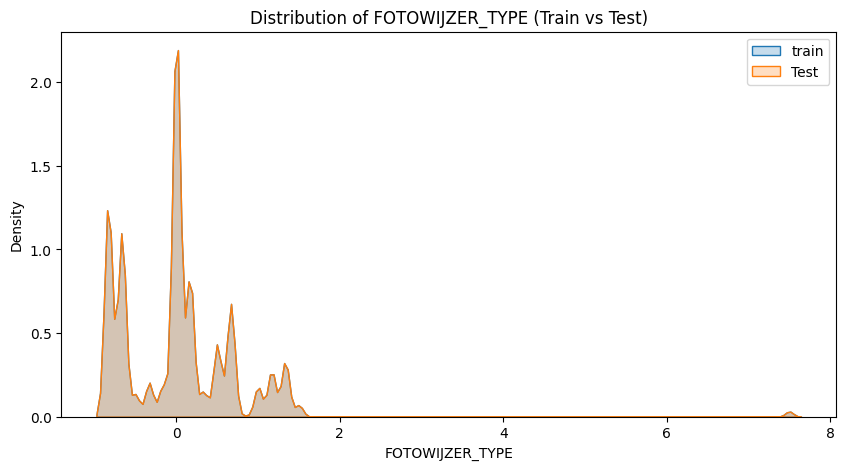

In [17]:
from sklearn.preprocessing import StandardScaler, RobustScaler
trans_features = ["SOC", "CALCOPP", "KAVOPP", "BOUWJAAR", "DUMMY_GARAGE", "DUMMY_MONUMENT", "FOTOWIJZER_TYPE", "DATUM"]
standard_scaler = RobustScaler()
X_train = standard_scaler.fit_transform(df_train[trans_features])
X_test = standard_scaler.transform(df_test[trans_features])

df_train_scaled = pd.DataFrame(X_train,columns=trans_features)
df_test_scaled = pd.DataFrame(X_train,columns=trans_features)

plot_feature_distribution(df_train_scaled, df_test_scaled, "SOC")
plot_feature_distribution(df_train_scaled, df_test_scaled, "CALCOPP")
plot_feature_distribution(df_train_scaled, df_test_scaled, "KAVOPP")
plot_feature_distribution(df_train_scaled, df_test_scaled, "DATUM")
plot_feature_distribution(df_train_scaled, df_test_scaled, "BOUWJAAR")
plot_feature_distribution(df_train_scaled, df_test_scaled, "DUMMY_GARAGE")
plot_feature_distribution(df_train_scaled, df_test_scaled, "DUMMY_MONUMENT")
plot_feature_distribution(df_train_scaled, df_test_scaled, "FOTOWIJZER_TYPE")


## Worst Baseline: if mean is predicted

In [70]:
# Mape if only mean is predicted
mean_price = df_combined["KOOPSOM"].mean()
mape =  abs(df_combined["KOOPSOM"] - mean_price)/df_combined["KOOPSOM"]
mape = mape.mean()
mape


0.5110385151268825

## Scaling Data

In [ ]:
robust_scaler = RobustScaler()
 
X_train = robust_scaler.fit_transform(df_train.drop(columns=['TRANSID', "KOOPSOM", "LOG_KOOPSOM","BUURTCODE"]))
y_train = df_train["LOG_KOOPSOM"]
X_test = robust_scaler.fit_transform(df_test.drop(columns=['TRANSID', "KOOPSOM", "LOG_KOOPSOM","BUURTCODE"]))
y_test = df_train["LOG_KOOPSOM"]

# df_train_rdm, df_test_rdm = 
# df_train_scaled = pd.DataFrame(X_train,columns=trans_features)
# df_test_scaled = pd.DataFrame(X_train,columns=trans_features)

## Cleaning and Preprocessing Neighbourhood Level Data

## Train GNN Embeddings and check performance

In [ ]:
from src.models.graph_embedding import NeighborhoodEmbedder
model = NeighborhoodEmbedder()

In [ ]:
from torch.utils.data import Dataset


In [ ]:
import torch
from torch.utils.data import DataLoader
def train(config_path, edge_index, train_dataset, test_dataset, device, hyperparameters):
    
    print(device)
    # torch.manual_seed(hyperparameters["seed"])
    batch_size=hyperparameters["batch_size"]
    train_data_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
    test_data_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=True)
    num_features = 1

    transaction_dim=train_dataset.__getnumfeatures__()

    model = EmbeddingModel(in_channels=num_features, gnn_hidden_channels=hyperparameters["gnn_hidden_channels"], out_channels=8, nn_hidden_channels=hyperparameters["nn_hidden_channels"], transaction_dims=transaction_dim)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
    loss_fn = torch.nn.MSELoss()
    

    num_epochs = 100
    buurt_ids = edge_index.columns.values

    buurt_idx_map = {k:int(v) for v,k in enumerate(buurt_ids)}
    

    edge_index = edge_index.to_numpy("float")
    edge_index = np.triu(edge_index)
    edge_index= torch.tensor(edge_index, dtype=torch.float32)
    edge_index_tensor = edge_index.to_sparse_csr()
    node_features = torch.tensor(list(buurt_idx_map.values()), dtype=torch.float).unsqueeze(1)
    
    train_losses, test_losses = [], []
    train_mapes, test_mapes = [], []

    # Training loop
    for epoch in range(num_epochs):
        train_loss, train_mape = train_epoch(model, train_data_loader, optimizer, edge_index_tensor, node_features, buurt_idx_map, loss_fn, device)

        test_loss, test_mape = evaluate_epoch(model, test_data_loader, loss_fn, edge_index_tensor, node_features, buurt_idx_map, device)

        train_losses.append(train_loss)
        train_mapes.append(train_mape)

        test_losses.append(test_loss)
        test_mapes.append(test_mape)
        print(f'Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Train MAPE = {train_mape:.4f},   Test Loss = {test_loss:.4f}, Test MAPE = {test_mape:.4f}')


    # Visualize Results
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
    plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Losses (MSE)')
    plt.yscale("log")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
    plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yscale("log")
    plt.title('Training and Test MAPE')
    plt.legend()
    plt.show()
